In [20]:
import chollaread
import yt
import trident
import numpy as np
import matplotlib.pyplot as plt

In [21]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5', cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2021-11-26 21:12:35,660 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-11-26 21:12:35,660 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2021-11-26 21:12:35,661 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-11-26 21:12:35,661 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2021-11-26 21:12:35,662 Parameters: cosmological_simulation   = 0.0


In [22]:
def spec_avg(x0, y0, z0, x, y, z, Ny, Nz,
             line, el, rom_num, lmin, lmax, lrest, gamma, f_value, amu,
             DIY=False, ind_p=True):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            
            if DIY==False: # Lines included in Trident
            
                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')
                
            else: # Lines not included in Trident that I have to 'DIY'
                sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None, identifier=line)

                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
  
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    fig = plt.figure(figsize=(15, 5))
    
    if ind_p==True:
        for p in range(Ny*Nz):
            plt.plot(arrays[0][0], arrays[p][1], alpha=0.8)
    else:
        pass
    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line)
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')
    
    return arrays[0][0], avg
    

In [23]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [24]:
def slicep(direction):

    sl = yt.SlicePlot(ds, direction, [("density")])
    sl.annotate_ray(ray_, arrow=True)
    sl.annotate_ray(ray_2, arrow=True)
    sl.annotate_ray(ray_3, arrow=True)
    sl.annotate_ray(ray_4, arrow=True)
    sl.set_cmap(("density"), "BLUE-RED")

    sl.show()

In [53]:
def proj(direction, a, b, a2, b2, a3, b3, a4, b4):
    
    px = yt.ProjectionPlot(ds, direction, 'density')
    px.annotate_marker((a,b), coord_system="plot", plot_args={"color":"dimgrey", "s": 150})
    px.annotate_marker((a2,b2), coord_system="plot", plot_args={"color":"black", "s": 150})
    px.annotate_marker((a3,b3), coord_system="plot", plot_args={"color":"dimgrey", "s": 150})
    px.annotate_marker((a4,b4), coord_system="plot", plot_args={"color":"black", "s": 150})
    px.show()

In [7]:
def compare(top_wav, top_flux, bot_wav, bot_flux, line):
    
    plt.figure(figsize=(15,5))

    plt.plot(top_wav, top_flux, label='Top', color='deeppink')
    plt.plot(bot_wav, bot_flux, label='Bottom', color='black')
    plt.title('Average Spectra:'+ line, fontsize=14)
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')
    plt.legend(fontsize='large')

In [45]:
(.36*10)-5

-1.4000000000000004

yt : [INFO     ] 2021-11-26 21:37:11,628 Projection completed
yt : [INFO     ] 2021-11-26 21:37:11,629 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2021-11-26 21:37:11,630 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2021-11-26 21:37:11,631 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2021-11-26 21:37:11,631 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2021-11-26 21:37:11,633 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fall


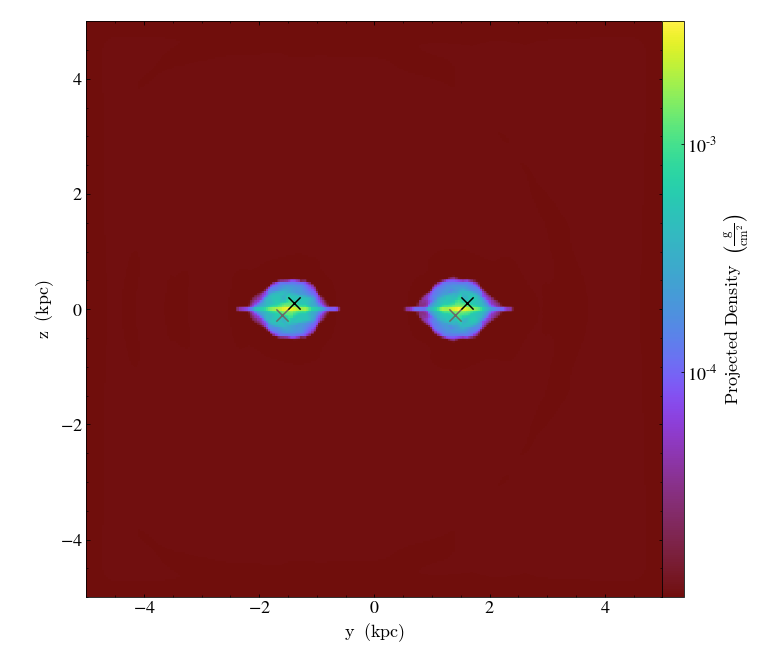

In [54]:
proj('x', 1.4,-0.1, 1.6, 0.1, -1.6, -0.1, -1.4, 0.1)

In [25]:
ray_ = make_ray(0,.64,.49,2,.64,.49)
ray_2 = make_ray(0,.66,.51,2,.66,.51)
ray_3 = make_ray(0,.34,.49,2,.34,.49)
ray_4 = make_ray(0,.36,.51,2,.36,.51)

yt : [INFO     ] 2021-11-26 21:13:23,074 Getting segment at z = 0.0: [0.    0.32  0.245] unitary to [1.    0.32  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-26 21:13:23,082 Getting subsegment: [0.0 unitary, 0.32 unitary, 0.245 unitary] to [1.0 unitary, 0.32 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-26 21:13:24,384 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2021-11-26 21:13:24,515 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-26 21:13:24,515 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-26 21:13:24,516 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-26 21:13:24,517 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-26

yt : [INFO     ] 2021-11-26 21:13:37,026 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2021-11-26 21:13:37,027 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2021-11-26 21:13:37,028 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2021-11-26 21:13:37,029 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2021-11-26 21:13:37,030 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/opt/anaconda3/e


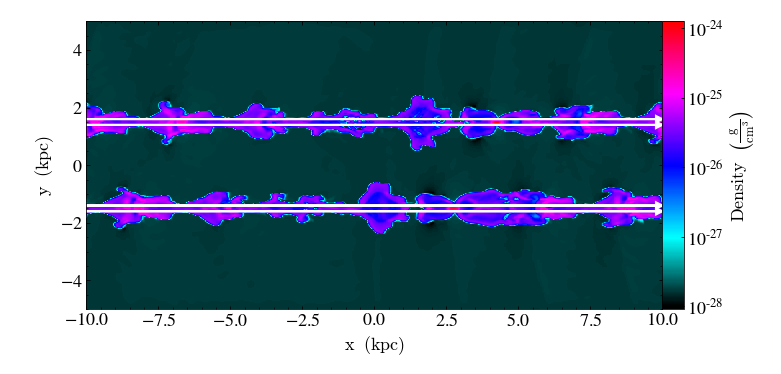

In [26]:
slicep('z')

yt : [INFO     ] 2021-11-26 21:14:01,882 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2021-11-26 21:14:01,882 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2021-11-26 21:14:01,883 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2021-11-26 21:14:01,884 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2021-11-26 21:14:01,885 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for


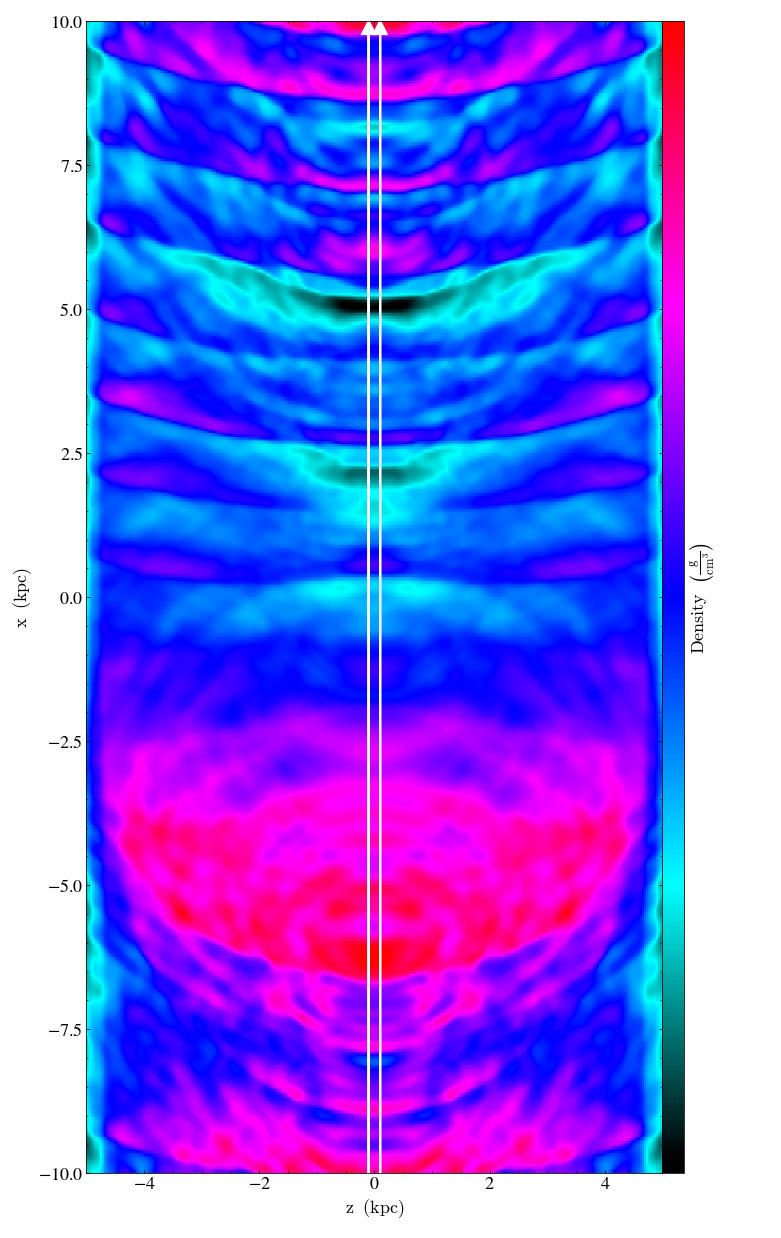

In [27]:
slicep('y')

## C IV

yt : [INFO     ] 2021-11-23 22:26:47,280 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 22:26:47,286 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 22:26:48,536 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 22:26:48,715 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:26:48,716 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 22:26:48,717 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:26:48,717 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_lengt

yt : [INFO     ] 2021-11-23 22:26:57,101 Getting segment at z = 0.0: [0.         0.31       0.25476562] unitary to [1.         0.31       0.25476562] unitary.
yt : [INFO     ] 2021-11-23 22:26:57,103 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.254765625 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 22:26:58,330 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 22:26:58,452 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:26:58,453 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 22:26:58,454 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:26:58,455 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 22:26:58,455 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:26:58,458 Setting instrument to Custo

yt : [INFO     ] 2021-11-23 22:27:06,966 Getting subsegment: [0.0 unitary, 0.311953125 unitary, 0.2528125 unitary] to [1.0 unitary, 0.311953125 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 22:27:08,230 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 22:27:08,365 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:27:08,366 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 22:27:08,367 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:27:08,368 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 22:27:08,369 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:27:08,371 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:27:08,391 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:27:08,401 Identified 2.490e+02 octs
yt : [

yt : [INFO     ] 2021-11-23 22:27:17,630 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:27:17,631 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 22:27:17,632 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:27:17,632 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 22:27:17,633 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:27:17,635 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:27:17,651 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:27:17,658 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:27:17,786 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:27:17,793 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3657

yt : [INFO     ] 2021-11-23 22:27:26,766 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:27:26,767 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 22:27:26,768 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:27:26,770 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:27:26,784 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:27:26,789 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:27:26,918 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:27:26,926 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3561.56it/s]
yt : [INFO     ] 2021-11-23 22:27:27,285 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 22:27:27,309 Getting segment at z = 0.0: [0.         0.31585938 

yt : [INFO     ] 2021-11-23 22:27:36,053 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:27:36,054 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:27:36,068 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:27:36,074 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:27:36,200 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:27:36,208 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3372.06it/s]
yt : [INFO     ] 2021-11-23 22:27:36,544 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 22:27:36,575 Getting segment at z = 0.0: [0.         0.3178125  0.24890625] unitary to [1.         0.3178125  0.24890625] unitary.
yt : [INFO     ] 2021-11-23 22:27:36,578 Getting subsegment: [0.0 unitary, 0.3178125 unitary, 0.24890625 unitary] to [1.0 unitary, 0.3178125 unitary, 0.24890625 u

yt : [INFO     ] 2021-11-23 22:27:45,809 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:27:45,963 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:27:45,971 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3658.74it/s]
yt : [INFO     ] 2021-11-23 22:27:46,316 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 22:27:46,339 Getting segment at z = 0.0: [0.         0.31976562 0.24695313] unitary to [1.         0.31976562 0.24695313] unitary.
yt : [INFO     ] 2021-11-23 22:27:46,341 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.24695312500000002 unitary] to [1.0 unitary, 0.319765625 unitary, 0.24695312500000002 unitary].
yt : [INFO     ] 2021-11-23 22:27:47,433 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 22:27:47,549 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:27:47,550 Parameters

yt : [INFO     ] 2021-11-23 22:27:55,139 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3645.26it/s]
yt : [INFO     ] 2021-11-23 22:27:55,483 Writing spectrum to ascii file: spec.txt.


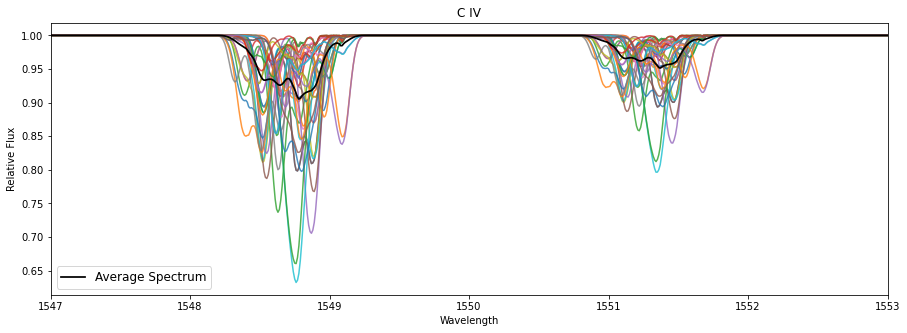

In [8]:
civ_top = spec_avg(0,.62,.49,2,.62,.49, 6, 6,
             'C IV', False, False, 1547, 1553, False, False, False, False,
             DIY=False, ind_p=True)

yt : [INFO     ] 2021-11-23 22:28:34,629 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 22:28:34,632 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 22:28:35,814 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 22:28:35,929 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:28:35,930 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 22:28:35,931 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:28:35,932 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 

yt : [INFO     ] 2021-11-23 22:28:44,340 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 22:28:45,416 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 22:28:45,532 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:28:45,533 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 22:28:45,534 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:28:45,535 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 22:28:45,535 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:28:45,537 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:28:45,553 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:28:45,559 Identified 2.490e+02 octs
yt : [INFO     ]

yt : [INFO     ] 2021-11-23 22:28:54,122 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 22:28:54,234 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:28:54,235 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 22:28:54,236 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:28:54,237 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 22:28:54,238 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:28:54,240 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:28:54,257 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:28:54,265 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:28:54,392 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:28:54,397 Creating spectrum
Addi

yt : [INFO     ] 2021-11-23 22:29:02,944 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 22:29:02,945 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 22:29:02,946 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 22:29:02,947 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:29:02,949 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:29:02,963 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:29:02,970 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:29:03,089 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:29:03,094 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3818.87it/s]
yt : [INFO     ] 2021-11-23 22:29:03,430 Writing spectrum to ascii file: spec.txt.
yt 

yt : [INFO     ] 2021-11-23 22:29:12,192 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 22:29:12,193 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 22:29:12,195 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:29:12,209 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:29:12,214 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:29:12,346 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:29:12,351 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3718.15it/s]
yt : [INFO     ] 2021-11-23 22:29:12,697 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 22:29:12,718 Getting segment at z = 0.0: [0.         0.16585938 0.25085937] unitary to [1.         0.16585938 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 22:29:12,

yt : [INFO     ] 2021-11-23 22:29:22,468 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 22:29:22,482 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 22:29:22,488 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:29:22,664 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:29:22,671 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2909.09it/s]
yt : [INFO     ] 2021-11-23 22:29:23,106 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 22:29:23,127 Getting segment at z = 0.0: [0.         0.1678125  0.24890625] unitary to [1.         0.1678125  0.24890625] unitary.
yt : [INFO     ] 2021-11-23 22:29:23,129 Getting subsegment: [0.0 unitary, 0.16781250000000003 unitary, 0.24890625 unitary] to [1.0 unitary, 0.16781250000000003 unitary, 0.24890625 unitary].
yt : [INFO     ] 2021-11-23 22:29:24,449 Saving field da

yt : [INFO     ] 2021-11-23 22:29:32,416 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 22:29:32,596 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 22:29:32,603 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3166.84it/s]
yt : [INFO     ] 2021-11-23 22:29:32,987 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 22:29:33,016 Getting segment at z = 0.0: [0.         0.16976563 0.24695313] unitary to [1.         0.16976563 0.24695313] unitary.
yt : [INFO     ] 2021-11-23 22:29:33,019 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.24695312500000002 unitary] to [1.0 unitary, 0.169765625 unitary, 0.24695312500000002 unitary].
yt : [INFO     ] 2021-11-23 22:29:34,456 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 22:29:34,609 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 22:29:34,610 Parameters

yt : [INFO     ] 2021-11-23 22:29:42,879 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2808.28it/s]
yt : [INFO     ] 2021-11-23 22:29:43,283 Writing spectrum to ascii file: spec.txt.


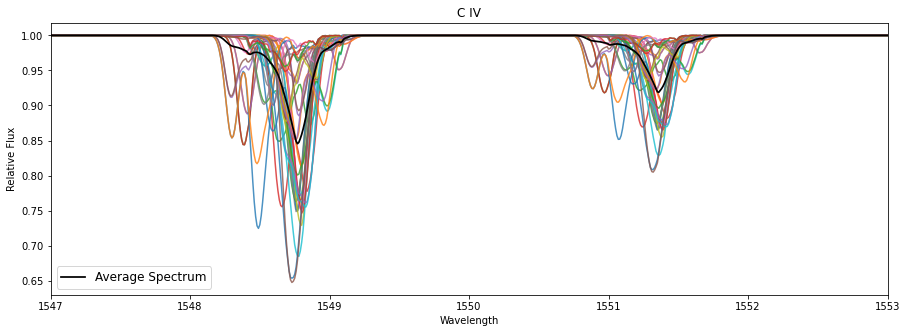

In [9]:
civ_bot = spec_avg(0,.32,.49,2,.32,.49, 6, 6,
             'C IV', False, False, 1547, 1553, False, False, False, False,
             DIY=False, ind_p=True)

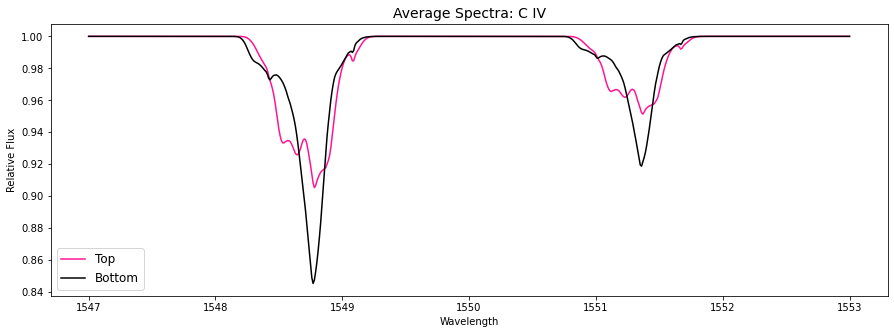

In [21]:
compare(civ_top[0], civ_top[1], civ_bot[0], civ_bot[1], ' C IV')

## Ly a

yt : [INFO     ] 2021-11-24 00:01:29,897 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-24 00:01:29,901 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-24 00:01:31,092 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-24 00:01:31,211 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-24 00:01:31,212 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:01:31,213 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:01:31,214 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_lengt

yt : [INFO     ] 2021-11-24 00:01:46,421 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-24 00:01:46,511 Getting segment at z = 0.0: [0.         0.31       0.25476562] unitary to [1.         0.31       0.25476562] unitary.
yt : [INFO     ] 2021-11-24 00:01:46,513 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.254765625 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-24 00:01:47,785 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-24 00:01:47,900 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-24 00:01:47,901 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:01:47,902 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:01:47,903 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:01:47,904 Parameters: cosmological_simu

yt : [INFO     ] 2021-11-24 00:02:03,352 Getting subsegment: [0.0 unitary, 0.311953125 unitary, 0.2528125 unitary] to [1.0 unitary, 0.311953125 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-24 00:02:04,541 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-24 00:02:04,710 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-24 00:02:04,711 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:02:04,712 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:02:04,713 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:02:04,715 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:02:04,717 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:02:04,735 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:02:04,744 Identified 2.490e+02 octs
yt : [

yt : [INFO     ] 2021-11-24 00:02:20,060 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-24 00:02:20,220 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-24 00:02:20,221 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:02:20,221 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:02:20,222 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:02:20,223 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:02:20,226 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:02:20,244 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:02:20,251 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:02:20,434 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:02:20,442 Creating spectrum
Adding 

yt : [INFO     ] 2021-11-24 00:02:38,261 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:02:38,262 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:02:38,262 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:02:38,263 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:02:38,265 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:02:38,278 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:02:38,285 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:02:38,409 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:02:38,416 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:03<00:00, 161.77it/s]
yt : [INFO     ] 2021-11-24 00:02:41,640 Not adding continuum Ly C: insufficient column density

yt : [INFO     ] 2021-11-24 00:02:58,759 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:02:58,760 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:02:58,762 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:02:58,777 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:02:58,783 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:02:58,917 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:02:58,925 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:01<00:00, 338.22it/s]
yt : [INFO     ] 2021-11-24 00:03:00,494 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-11-24 00:03:00,496 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-24 00:03:00,578 Getting segment at z = 0.0: [0.         0.3178125  0

yt : [INFO     ] 2021-11-24 00:03:19,768 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:03:19,782 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:03:19,788 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:03:19,916 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:03:19,923 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:01<00:00, 419.00it/s]
yt : [INFO     ] 2021-11-24 00:03:21,202 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-11-24 00:03:21,203 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-24 00:03:21,286 Getting segment at z = 0.0: [0.         0.31976562 0.24695313] unitary to [1.         0.31976562 0.24695313] unitary.
yt : [INFO     ] 2021-11-24 00:03:21,288 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.24695312500000002 unitary] to [1.0 unitary, 0.

yt : [INFO     ] 2021-11-24 00:03:39,073 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:03:39,202 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:03:39,209 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:01<00:00, 413.93it/s]
yt : [INFO     ] 2021-11-24 00:03:40,501 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-11-24 00:03:40,502 Writing spectrum to ascii file: spec.txt.


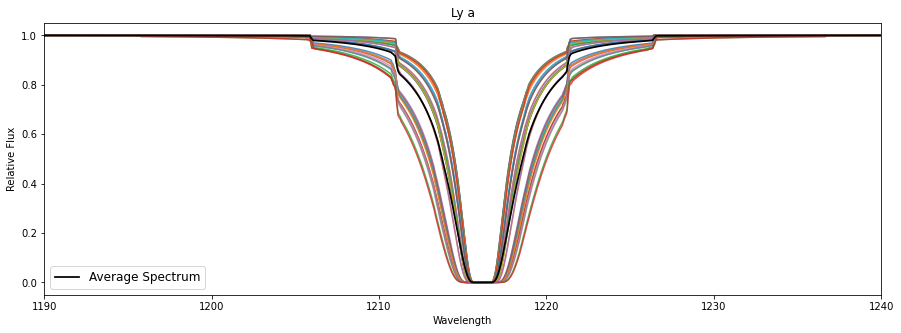

In [42]:
lya_top = spec_avg(0,.62,.49,2,.62,.49, 6, 6,
             'Ly a', False, False, 1190, 1240, False, False, False, False,
             DIY=False, ind_p=True)

yt : [INFO     ] 2021-11-24 00:04:05,887 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-24 00:04:05,890 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-24 00:04:07,213 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-24 00:04:07,327 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-24 00:04:07,328 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:04:07,328 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:04:07,329 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 

yt : [INFO     ] 2021-11-24 00:04:20,238 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-24 00:04:21,541 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-24 00:04:21,657 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-24 00:04:21,658 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:04:21,658 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:04:21,659 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:04:21,660 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:04:21,662 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:04:21,676 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:04:21,682 Identified 2.490e+02 octs
yt : [INFO     ]

yt : [INFO     ] 2021-11-24 00:04:36,340 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-24 00:04:36,449 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-24 00:04:36,450 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:04:36,451 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:04:36,452 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:04:36,452 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:04:36,455 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:04:36,470 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:04:36,477 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:04:36,603 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:04:36,611 Creating spectrum
Adding 

yt : [INFO     ] 2021-11-24 00:04:50,460 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-24 00:04:50,461 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-24 00:04:50,462 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:04:50,463 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:04:50,466 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:04:50,481 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:04:50,487 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:04:50,627 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:04:50,634 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:02<00:00, 227.28it/s]
yt : [INFO     ] 2021-11-24 00:04:52,945 Not adding continuum Ly C: insufficient column density

yt : [INFO     ] 2021-11-24 00:05:05,128 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-24 00:05:05,129 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:05:05,131 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:05:05,145 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:05:05,151 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:05:05,281 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:05:05,289 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:02<00:00, 214.46it/s]
yt : [INFO     ] 2021-11-24 00:05:07,732 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-11-24 00:05:07,733 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-24 00:05:07,818 Getting segment at z = 0.0: [0.         0.16585938 0

yt : [INFO     ] 2021-11-24 00:05:21,492 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-24 00:05:21,494 Setting instrument to Custom
yt : [INFO     ] 2021-11-24 00:05:21,515 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:05:21,524 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:05:21,740 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:05:21,749 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:01<00:00, 344.47it/s]
yt : [INFO     ] 2021-11-24 00:05:23,297 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-11-24 00:05:23,298 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-24 00:05:23,381 Getting segment at z = 0.0: [0.         0.1678125  0.24890625] unitary to [1.         0.1678125  0.24890625] unitary.
yt : [INFO     ] 2021-11-24 00:05:23,383 Getting subsegment

yt : [INFO     ] 2021-11-24 00:05:40,366 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-24 00:05:40,375 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-24 00:05:40,563 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:05:40,572 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:01<00:00, 327.83it/s]
yt : [INFO     ] 2021-11-24 00:05:42,207 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-11-24 00:05:42,208 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-24 00:05:42,292 Getting segment at z = 0.0: [0.         0.16976563 0.24695313] unitary to [1.         0.16976563 0.24695313] unitary.
yt : [INFO     ] 2021-11-24 00:05:42,294 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.24695312500000002 unitary] to [1.0 unitary, 0.169765625 unitary, 0.24695312500000002 unitary].
yt : [INFO     ] 2021

yt : [INFO     ] 2021-11-24 00:05:59,169 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-24 00:05:59,176 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:01<00:00, 424.42it/s]
yt : [INFO     ] 2021-11-24 00:06:00,434 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-11-24 00:06:00,435 Writing spectrum to ascii file: spec.txt.


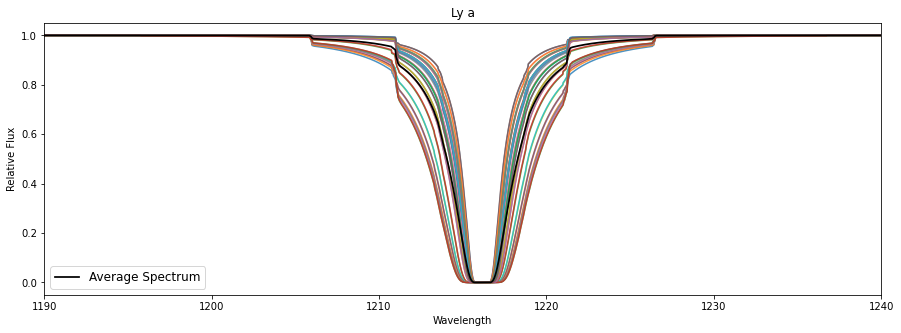

In [43]:
lya_bottom = spec_avg(0,.32,.49,2,.32,.49, 6, 6,
             'Ly a', False, False, 1190, 1240, False, False, False, False,
             DIY=False, ind_p=True)

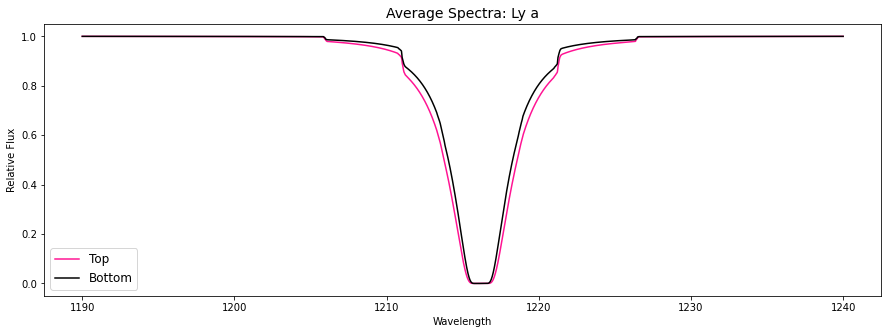

In [44]:
compare(lya_top[0], lya_top[1], lya_bottom[0], lya_bottom[1], ' Ly a')

## O I 1302

yt : [INFO     ] 2021-11-23 23:06:22,759 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
yt : [INFO     ] 2021-11-23 23:06:22,761 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:06:24,031 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:06:24,147 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:06:24,148 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:06:24,149 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:06:24,150 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:06:24,150 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:06:24,152 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:06:24,166

yt : [INFO     ] 2021-11-23 23:06:32,655 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:06:32,656 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:06:32,658 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:06:32,671 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:06:32,677 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:06:32,809 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:06:32,817 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4387.43it/s]
yt : [INFO     ] 2021-11-23 23:06:32,988 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:06:33,004 Getting segment at z = 0.0: [0.         0.31195312 0.245     ] unitary to [1.         0.31195312 0.245     ] unitary.
yt : [INFO     ] 2021-11-23 23:06:33,006 

yt : [INFO     ] 2021-11-23 23:06:53,974 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:06:53,974 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:06:53,976 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:06:53,977 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:06:53,979 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:06:53,997 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:06:54,007 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:06:54,187 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:06:54,193 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2787.04it/s]
yt : [INFO     ] 2021-11-23 23:06:54,433 Writing spectrum to ascii file: spec.txt.
yt : [I

yt : [INFO     ] 2021-11-23 23:07:04,291 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:07:04,297 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1195.09it/s]
yt : [INFO     ] 2021-11-23 23:07:04,782 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:07:04,797 Getting segment at z = 0.0: [0.         0.31585938 0.2528125 ] unitary to [1.         0.31585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:07:04,799 Getting subsegment: [0.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary] to [1.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:07:06,359 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:07:06,490 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:07:06,491 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:07:06,

yt : [INFO     ] 2021-11-23 23:07:16,103 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:07:16,220 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:07:16,221 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:07:16,222 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:07:16,222 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:07:16,223 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:07:16,225 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:07:16,244 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:07:16,250 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:07:16,390 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:07:16,398 Creating spectrum
Adding 

yt : [INFO     ] 2021-11-23 23:07:25,522 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:07:25,717 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:07:25,726 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1350.53it/s]
yt : [INFO     ] 2021-11-23 23:07:26,165 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:07:26,182 Getting segment at z = 0.0: [0.         0.31976562 0.25085937] unitary to [1.         0.31976562 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:07:26,183 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.319765625 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:07:27,371 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:07:27,507 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:07:27,507 Parameters: domain_dimensions 

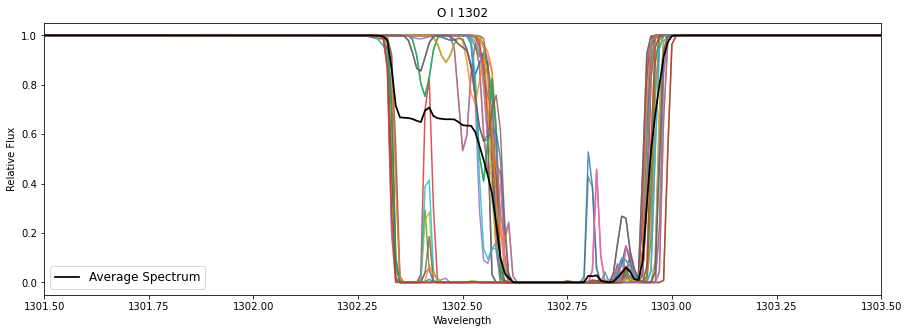

In [13]:
oi1302_t = spec_avg(0, .62, .49, 2, .62, .49, 6, 6,
                   'O I 1302', False, False, 1301.5, 1303.5,
                   False, False, False, False, DIY=False, ind_p=True)

yt : [INFO     ] 2021-11-23 23:08:10,680 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:08:10,683 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:08:11,955 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:08:12,123 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:08:12,124 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:08:12,124 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:08:12,125 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 

yt : [INFO     ] 2021-11-23 23:08:22,031 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:08:22,032 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:08:22,033 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:08:22,035 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:08:22,051 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:08:22,059 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:08:22,215 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:08:22,222 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4329.92it/s]
yt : [INFO     ] 2021-11-23 23:08:22,400 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:08:22,417 Getting segment at z = 0.0: [0.         0.16195313 0.24

yt : [INFO     ] 2021-11-23 23:08:31,478 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3219.08it/s]
yt : [INFO     ] 2021-11-23 23:08:31,699 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:08:31,715 Getting segment at z = 0.0: [0.         0.16195313 0.25476562] unitary to [1.         0.16195313 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:08:31,716 Getting subsegment: [0.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:08:32,912 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:08:33,023 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:08:33,024 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:08:33,025 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:08:33,026 P

yt : [INFO     ] 2021-11-23 23:08:42,341 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:08:42,342 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:08:42,343 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:08:42,343 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:08:42,345 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:08:42,359 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:08:42,365 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:08:42,512 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:08:42,518 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3018.92it/s]
yt : [INFO     ] 2021-11-23 23:08:42,744 Writing spectrum to ascii file: spec.txt.
yt : [I

yt : [INFO     ] 2021-11-23 23:08:51,527 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1422.87it/s]
yt : [INFO     ] 2021-11-23 23:08:51,969 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:08:51,985 Getting segment at z = 0.0: [0.         0.16585938 0.2528125 ] unitary to [1.         0.16585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:08:51,987 Getting subsegment: [0.0 unitary, 0.165859375 unitary, 0.2528125 unitary] to [1.0 unitary, 0.165859375 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:08:53,422 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:08:53,607 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:08:53,608 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:08:53,609 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:08:53,611 Parameters: domain_ri

yt : [INFO     ] 2021-11-23 23:09:03,765 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:09:03,766 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:09:03,766 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:09:03,767 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:09:03,768 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:09:03,770 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:09:03,786 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:09:03,795 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:09:03,937 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:09:03,944 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1442.29i

yt : [INFO     ] 2021-11-23 23:09:14,156 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:09:14,386 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:09:14,394 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1034.74it/s]
yt : [INFO     ] 2021-11-23 23:09:14,936 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:09:14,952 Getting segment at z = 0.0: [0.         0.16976563 0.25085937] unitary to [1.         0.16976563 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:09:14,954 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.169765625 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:09:16,414 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:09:16,557 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:09:16,558 Parameters: domain_dimensions 

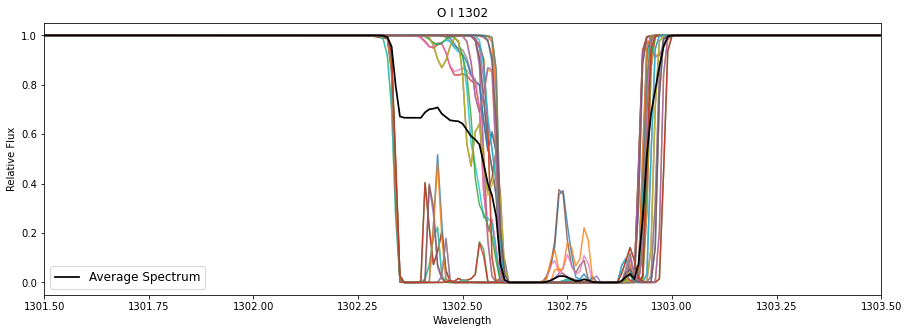

In [14]:
oi1302_b = spec_avg(0, .32, .49, 2, .32, .49, 6, 6,
                   'O I 1302', False, False, 1301.5, 1303.5,
                   False, False, False, False, DIY=False, ind_p=True)

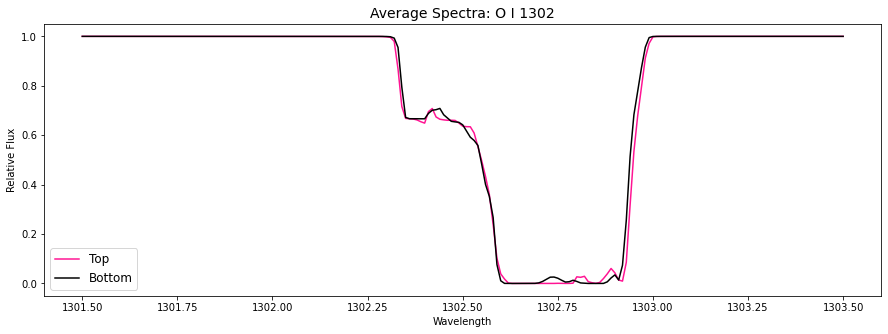

In [22]:
compare(oi1302_t[0], oi1302_t[1], oi1302_b[0], oi1302_b[1], ' O I 1302')

## Si II 1304

yt : [INFO     ] 2021-11-23 23:12:07,627 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:12:07,630 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:12:08,944 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:12:09,084 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:12:09,085 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:12:09,086 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:12:09,086 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_lengt

yt : [INFO     ] 2021-11-23 23:12:18,574 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:12:18,574 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:12:18,575 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:12:18,576 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:12:18,577 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:12:18,579 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:12:18,593 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:12:18,599 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:12:18,732 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:12:18,740 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 31

yt : [INFO     ] 2021-11-23 23:12:27,692 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:12:27,841 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:12:27,850 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1632.84it/s]
yt : [INFO     ] 2021-11-23 23:12:28,235 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:12:28,252 Getting segment at z = 0.0: [0.         0.31195312 0.25476562] unitary to [1.         0.31195312 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:12:28,255 Getting subsegment: [0.0 unitary, 0.311953125 unitary, 0.254765625 unitary] to [1.0 unitary, 0.311953125 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:12:29,614 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:12:29,752 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:12:29,753 Parameters: domain_dimen

yt : [INFO     ] 2021-11-23 23:12:40,306 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:12:40,456 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:12:40,457 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:12:40,458 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:12:40,459 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:12:40,459 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:12:40,461 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:12:40,481 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:12:40,489 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:12:40,627 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:12:40,632 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:12:50,246 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:12:50,261 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:12:50,267 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:12:50,395 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:12:50,400 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1140.39it/s]
yt : [INFO     ] 2021-11-23 23:12:50,906 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:12:50,922 Getting segment at z = 0.0: [0.         0.31585938 0.2528125 ] unitary to [1.         0.31585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:12:50,924 Getting subsegment: [0.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary] to [1.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:12:52,271 Saving field da

yt : [INFO     ] 2021-11-23 23:13:01,670 Getting subsegment: [0.0 unitary, 0.3178125 unitary, 0.250859375 unitary] to [1.0 unitary, 0.3178125 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:13:03,076 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:13:03,221 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:13:03,222 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:13:03,222 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:13:03,223 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:13:03,224 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:13:03,226 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:13:03,244 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:13:03,252 Identified 2.490e+02 octs
yt : [

yt : [INFO     ] 2021-11-23 23:13:13,039 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:13:13,041 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:13:13,057 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:13:13,063 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:13:13,208 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:13:13,216 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 911.88it/s] 
yt : [INFO     ] 2021-11-23 23:13:13,838 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:13:13,856 Getting segment at z = 0.0: [0.         0.31976562 0.25085937] unitary to [1.         0.31976562 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:13:13,859 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.319765625 unitary, 0.250

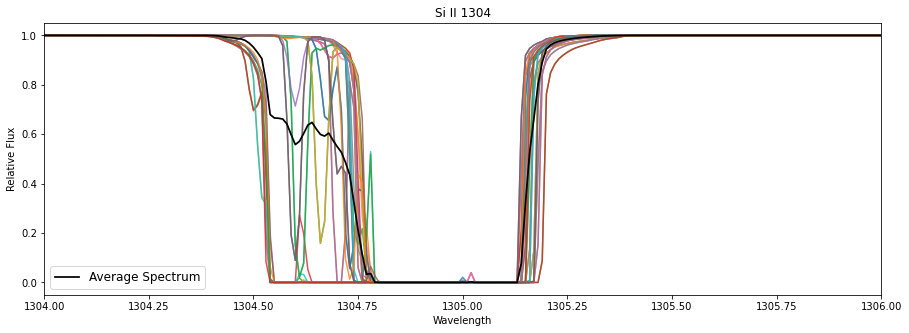

In [16]:
si1304_t = spec_avg(0, .62, .49, 2, .62, .49, 6, 6,
                   'Si II 1304', False, False, 1304, 1306,
                   False, False, False, False, DIY=False, ind_p=True)

yt : [INFO     ] 2021-11-23 23:14:14,140 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:14:14,143 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:14:15,570 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:14:15,714 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:14:15,715 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:14:15,716 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:14:15,717 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 

yt : [INFO     ] 2021-11-23 23:14:25,379 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:14:25,380 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:14:25,381 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:14:25,383 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:14:25,397 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:14:25,404 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:14:25,534 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:14:25,541 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3325.58it/s]
yt : [INFO     ] 2021-11-23 23:14:25,759 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:14:25,775 Getting segment at z = 0.0: [0.         0.1619531

yt : [INFO     ] 2021-11-23 23:14:35,450 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:14:35,457 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2283.27it/s]
yt : [INFO     ] 2021-11-23 23:14:35,737 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:14:35,752 Getting segment at z = 0.0: [0.         0.16195313 0.25476562] unitary to [1.         0.16195313 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:14:35,754 Getting subsegment: [0.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:14:36,992 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:14:37,109 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:14:37,109 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23

yt : [INFO     ] 2021-11-23 23:14:46,379 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:14:46,511 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:14:46,512 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:14:46,513 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:14:46,514 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:14:46,516 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:14:46,518 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:14:46,538 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:14:46,545 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:14:46,698 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:14:46,703 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:14:55,985 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:14:55,990 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:14:56,172 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:14:56,177 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 787.35it/s]
yt : [INFO     ] 2021-11-23 23:14:56,910 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:14:56,928 Getting segment at z = 0.0: [0.         0.16585938 0.2528125 ] unitary to [1.         0.16585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:14:56,931 Getting subsegment: [0.0 unitary, 0.165859375 unitary, 0.2528125 unitary] to [1.0 unitary, 0.165859375 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:14:58,352 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:14:58,537 Parameters: current_

yt : [INFO     ] 2021-11-23 23:15:07,800 Getting subsegment: [0.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary] to [1.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:15:09,229 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:15:09,361 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:15:09,362 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:15:09,362 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:15:09,363 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:15:09,364 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:15:09,366 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:15:09,380 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:15:09,386 Identified 2

yt : [INFO     ] 2021-11-23 23:15:19,956 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:15:19,958 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:15:19,972 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:15:19,978 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:15:20,130 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:15:20,135 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1013.39it/s]
yt : [INFO     ] 2021-11-23 23:15:20,698 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:15:20,716 Getting segment at z = 0.0: [0.         0.16976563 0.25085937] unitary to [1.         0.16976563 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:15:20,718 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.169765625 unitary, 0.250

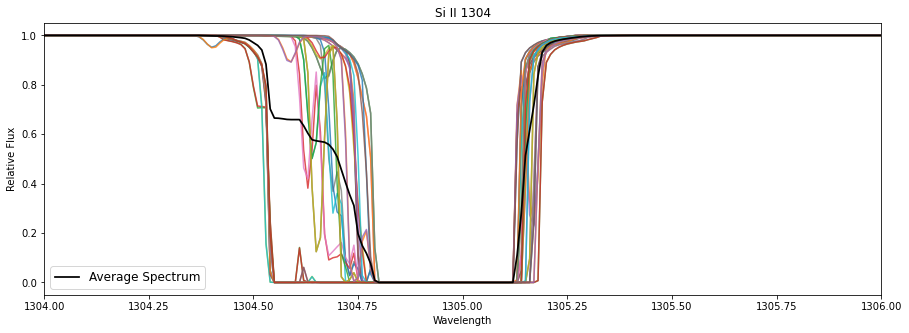

In [17]:
si1304_b = spec_avg(0, .32, .49, 2, .32, .49, 6, 6,
                   'Si II 1304', False, False, 1304, 1306,
                   False, False, False, False, DIY=False, ind_p=True)

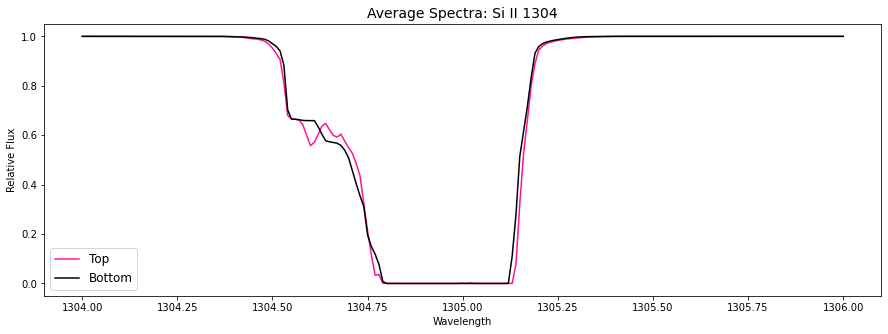

In [23]:
compare(si1304_t[0], si1304_t[1], si1304_b[0], si1304_b[1], ' Si II 1304')

## C II 1335

yt : [INFO     ] 2021-11-23 23:19:11,708 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:19:11,712 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:19:12,967 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:19:13,092 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:19:13,093 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:19:13,093 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:19:13,094 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_lengt

yt : [INFO     ] 2021-11-23 23:19:23,516 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:19:23,517 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:19:23,517 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:19:23,518 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:19:23,519 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:19:23,521 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:19:23,539 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:19:23,547 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:19:23,717 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:19:23,726 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3038

yt : [INFO     ] 2021-11-23 23:19:33,257 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:19:33,448 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:19:33,457 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2732.75it/s]
yt : [INFO     ] 2021-11-23 23:19:33,717 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:19:33,734 Getting segment at z = 0.0: [0.         0.31195312 0.25476562] unitary to [1.         0.31195312 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:19:33,736 Getting subsegment: [0.0 unitary, 0.311953125 unitary, 0.254765625 unitary] to [1.0 unitary, 0.311953125 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:19:35,042 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:19:35,156 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:19:35,157 Parameters: domain_dimensi

yt : [INFO     ] 2021-11-23 23:19:44,730 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:19:44,843 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:19:44,843 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:19:44,844 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:19:44,845 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:19:44,846 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:19:44,848 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:19:44,863 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:19:44,869 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:19:45,003 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:19:45,008 Creating spectrum
Addi

yt : [INFO     ] 2021-11-23 23:19:54,833 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:19:54,847 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:19:54,852 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:19:54,978 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:19:54,986 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1528.09it/s]
yt : [INFO     ] 2021-11-23 23:19:55,378 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:19:55,394 Getting segment at z = 0.0: [0.         0.31585938 0.2528125 ] unitary to [1.         0.31585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:19:55,397 Getting subsegment: [0.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary] to [1.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:19:56,596 Saving field data

yt : [INFO     ] 2021-11-23 23:20:05,122 Getting subsegment: [0.0 unitary, 0.3178125 unitary, 0.250859375 unitary] to [1.0 unitary, 0.3178125 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:20:06,324 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:20:06,438 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:20:06,438 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:20:06,439 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:20:06,440 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:20:06,441 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:20:06,443 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:20:06,459 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:20:06,465 Identified 2.490e+02 octs
yt : [

yt : [INFO     ] 2021-11-23 23:20:15,584 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:20:15,586 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:20:15,603 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:20:15,608 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:20:15,737 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:20:15,742 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1340.63it/s]
yt : [INFO     ] 2021-11-23 23:20:16,178 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:20:16,194 Getting segment at z = 0.0: [0.         0.31976562 0.25085937] unitary to [1.         0.31976562 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:20:16,196 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.319765625 unitary, 0.25085

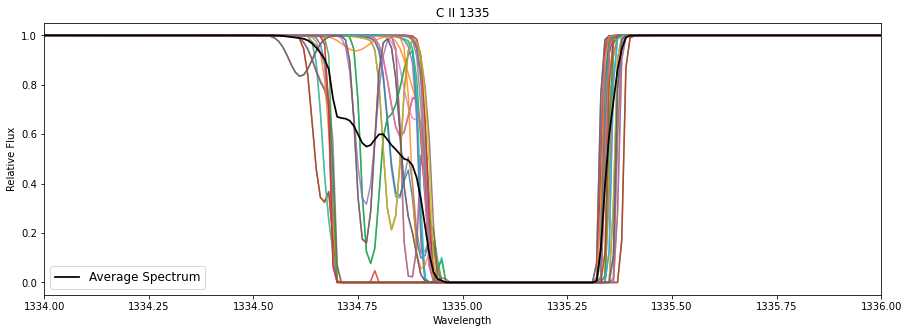

In [24]:
cii1335_t = spec_avg(0, .62, .49, 2, .62, .49, 6, 6,
                   'C II 1335', False, False, 1334, 1336,
                   False, False, False, False, DIY=False, ind_p=True)

yt : [INFO     ] 2021-11-23 23:20:36,808 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:20:36,811 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:20:38,025 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:20:38,148 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:20:38,149 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:20:38,150 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:20:38,151 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 

yt : [INFO     ] 2021-11-23 23:20:47,180 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:20:47,181 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:20:47,182 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:20:47,184 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:20:47,203 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:20:47,211 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:20:47,423 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:20:47,431 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3026.17it/s]
yt : [INFO     ] 2021-11-23 23:20:47,674 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:20:47,693 Getting segment at z = 0.0: [0.         0.16195313 

yt : [INFO     ] 2021-11-23 23:20:56,483 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2870.82it/s]
yt : [INFO     ] 2021-11-23 23:20:56,717 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:20:56,733 Getting segment at z = 0.0: [0.         0.16195313 0.25476562] unitary to [1.         0.16195313 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:20:56,736 Getting subsegment: [0.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:20:57,884 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:20:57,996 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:20:57,996 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:20:57,997 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:20:57,998 

yt : [INFO     ] 2021-11-23 23:21:07,021 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:21:07,022 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:21:07,023 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:21:07,024 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:21:07,025 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:21:07,028 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:21:07,051 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:21:07,062 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:21:07,236 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:21:07,246 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2141

yt : [INFO     ] 2021-11-23 23:21:17,757 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:21:17,902 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:21:17,910 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1519.64it/s]
yt : [INFO     ] 2021-11-23 23:21:18,316 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:21:18,332 Getting segment at z = 0.0: [0.         0.16585938 0.2528125 ] unitary to [1.         0.16585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:21:18,335 Getting subsegment: [0.0 unitary, 0.165859375 unitary, 0.2528125 unitary] to [1.0 unitary, 0.165859375 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:21:19,873 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:21:20,047 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:21:20,048 Parameters: domain_dimensions 

yt : [INFO     ] 2021-11-23 23:21:30,899 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:21:31,071 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:21:31,072 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:21:31,074 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:21:31,075 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:21:31,076 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:21:31,078 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:21:31,098 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:21:31,111 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:21:31,258 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:21:31,263 Creating spectrum
Addi

yt : [INFO     ] 2021-11-23 23:21:40,918 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:21:40,924 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:21:41,050 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:21:41,057 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1368.75it/s]
yt : [INFO     ] 2021-11-23 23:21:41,480 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:21:41,496 Getting segment at z = 0.0: [0.         0.16976563 0.25085937] unitary to [1.         0.16976563 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:21:41,498 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.169765625 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:21:42,703 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:21:42,812 Parameters: curre

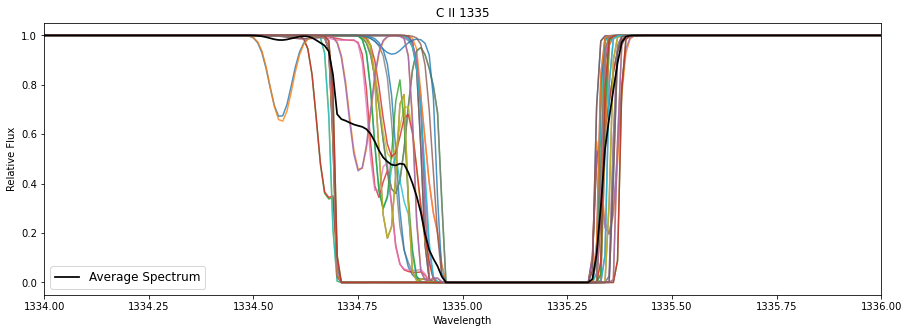

In [25]:
cii1335_b = spec_avg(0, .32, .49, 2, .32, .49, 6, 6,
                   'C II 1335', False, False, 1334, 1336,
                   False, False, False, False, DIY=False, ind_p=True)

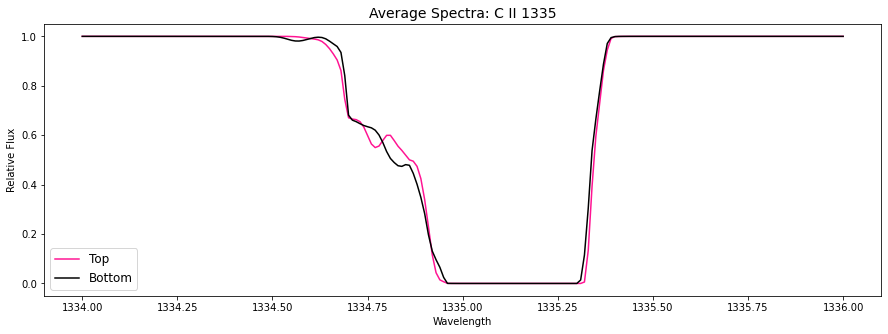

In [26]:
compare(cii1335_t[0], cii1335_t[1], cii1335_b[0], cii1335_b[1], ' C II 1335')

## Si IV 1393

yt : [INFO     ] 2021-11-23 23:27:32,064 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:27:32,067 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:27:33,468 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:27:33,633 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:27:33,634 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:27:33,634 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:27:33,635 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_lengt

yt : [INFO     ] 2021-11-23 23:27:43,064 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:27:43,065 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:27:43,066 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:27:43,067 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:27:43,067 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:27:43,070 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:27:43,084 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:27:43,091 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:27:43,227 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:27:43,233 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 512/512 [00:00<00:00, 36

yt : [INFO     ] 2021-11-23 23:27:53,062 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:27:53,228 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:27:53,234 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3980.04it/s]
yt : [INFO     ] 2021-11-23 23:27:53,429 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:27:53,447 Getting segment at z = 0.0: [0.         0.31195312 0.25476562] unitary to [1.         0.31195312 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:27:53,450 Getting subsegment: [0.0 unitary, 0.311953125 unitary, 0.254765625 unitary] to [1.0 unitary, 0.311953125 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:27:54,842 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:27:55,009 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:27:55,009 Parameters: domain_dimen

yt : [INFO     ] 2021-11-23 23:28:04,524 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:28:04,636 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:28:04,637 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:28:04,638 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:28:04,639 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:28:04,639 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:28:04,642 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:28:04,657 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:28:04,664 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:28:04,803 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:28:04,808 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:28:13,819 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:28:13,833 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:28:13,840 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:28:13,982 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:28:13,987 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1799.34it/s]
yt : [INFO     ] 2021-11-23 23:28:14,334 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:28:14,351 Getting segment at z = 0.0: [0.         0.31585938 0.2528125 ] unitary to [1.         0.31585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:28:14,353 Getting subsegment: [0.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary] to [1.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:28:15,851 Saving field da

yt : [INFO     ] 2021-11-23 23:28:23,859 Getting subsegment: [0.0 unitary, 0.3178125 unitary, 0.250859375 unitary] to [1.0 unitary, 0.3178125 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:28:24,967 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:28:25,074 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:28:25,075 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:28:25,076 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:28:25,077 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:28:25,077 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:28:25,079 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:28:25,096 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:28:25,102 Identified 2.490e+02 octs
yt : [

yt : [INFO     ] 2021-11-23 23:28:35,036 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:28:35,038 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:28:35,055 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:28:35,062 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:28:35,204 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:28:35,209 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2019.36it/s]
yt : [INFO     ] 2021-11-23 23:28:35,522 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:28:35,538 Getting segment at z = 0.0: [0.         0.31976562 0.25085937] unitary to [1.         0.31976562 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:28:35,540 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.319765625 unitary, 0.250

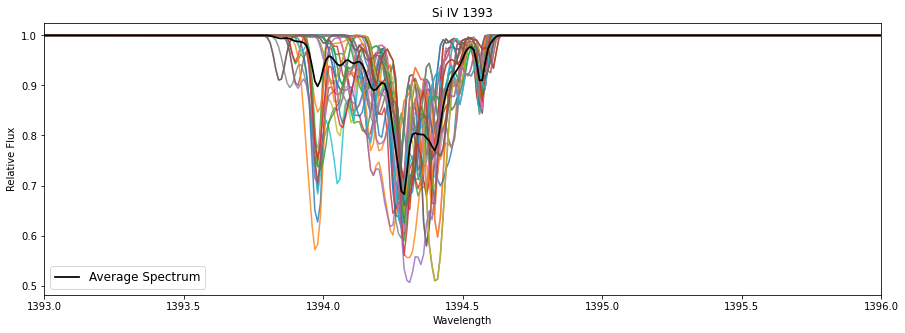

In [28]:
si1393_t = spec_avg(0, .62, .49, 2, .62, .49, 6, 6,
                    'Si IV 1393', 'Si', 'IV', 1393, 1396, 1393.76, 9.0E+8, 5.24E-01, 28.08,
                    DIY=True, ind_p=True)

yt : [INFO     ] 2021-11-23 23:29:07,364 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:29:07,367 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:29:08,595 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:29:08,743 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:29:08,743 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:29:08,744 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:29:08,745 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 

yt : [INFO     ] 2021-11-23 23:29:18,738 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:29:18,739 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:29:18,741 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:29:18,743 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:29:18,763 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:29:18,771 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:29:18,971 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:29:18,977 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3783.31it/s]
yt : [INFO     ] 2021-11-23 23:29:19,192 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:29:19,218 Getting segment at z = 0.0: [0.         0.1619531

yt : [INFO     ] 2021-11-23 23:29:28,832 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:29:28,841 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3598.41it/s]
yt : [INFO     ] 2021-11-23 23:29:29,046 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:29:29,065 Getting segment at z = 0.0: [0.         0.16195313 0.25476562] unitary to [1.         0.16195313 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:29:29,068 Getting subsegment: [0.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:29:30,374 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:29:30,486 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:29:30,487 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23

yt : [INFO     ] 2021-11-23 23:29:39,968 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:29:40,136 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:29:40,137 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:29:40,137 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:29:40,138 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:29:40,140 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:29:40,143 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:29:40,163 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:29:40,172 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:29:40,310 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:29:40,318 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:29:49,382 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:29:49,391 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:29:49,592 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:29:49,601 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1861.05it/s]
yt : [INFO     ] 2021-11-23 23:29:49,958 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:29:49,976 Getting segment at z = 0.0: [0.         0.16585938 0.2528125 ] unitary to [1.         0.16585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:29:49,978 Getting subsegment: [0.0 unitary, 0.165859375 unitary, 0.2528125 unitary] to [1.0 unitary, 0.165859375 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:29:51,266 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:29:51,390 Parameters: current

yt : [INFO     ] 2021-11-23 23:29:59,292 Getting subsegment: [0.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary] to [1.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:30:00,570 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:30:00,693 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:30:00,694 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:30:00,695 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:30:00,696 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:30:00,697 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:30:00,699 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:30:00,719 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:30:00,725 Identified 2

yt : [INFO     ] 2021-11-23 23:30:09,968 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:30:09,970 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:30:09,988 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:30:09,995 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:30:10,141 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:30:10,149 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1513.85it/s]
yt : [INFO     ] 2021-11-23 23:30:10,553 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:30:10,573 Getting segment at z = 0.0: [0.         0.16976563 0.25085937] unitary to [1.         0.16976563 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:30:10,575 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.169765625 unitary, 0.250

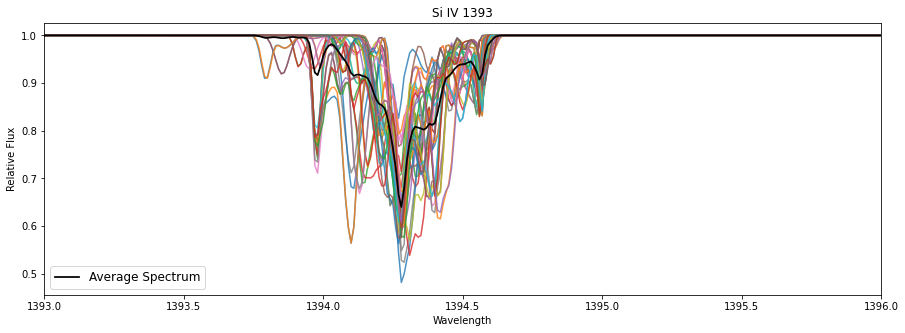

In [29]:
si1393_b = spec_avg(0, .32, .49, 2, .32, .49, 6, 6,
                    'Si IV 1393', 'Si', 'IV', 1393, 1396, 1393.76, 9.0E+8, 5.24E-01, 28.08,
                    DIY=True, ind_p=True)

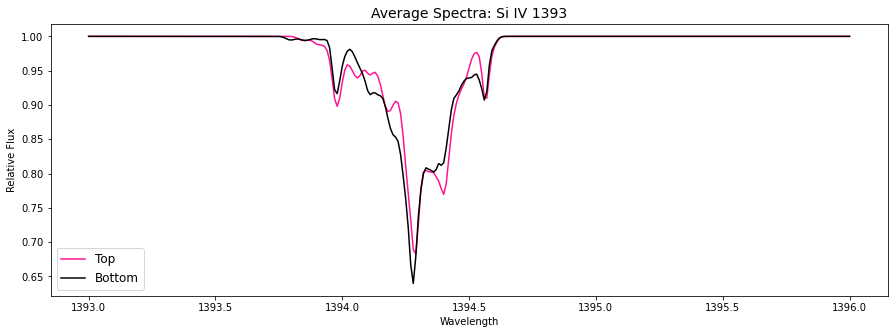

In [30]:
compare(si1393_t[0], si1393_t[1], si1393_b[0], si1393_b[1], ' Si IV 1393')

## Al III 1854

yt : [INFO     ] 2021-11-23 23:31:40,329 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:31:40,332 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:31:41,606 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:31:41,725 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:31:41,726 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:31:41,727 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:31:41,728 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_lengt

yt : [INFO     ] 2021-11-23 23:31:51,924 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:31:51,925 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:31:51,926 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:31:51,927 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:31:51,927 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:31:51,930 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:31:51,946 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:31:51,953 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:31:52,099 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:31:52,106 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 5

yt : [INFO     ] 2021-11-23 23:32:01,475 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:32:01,674 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:32:01,679 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3723.96it/s]
yt : [INFO     ] 2021-11-23 23:32:01,897 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:32:01,912 Getting segment at z = 0.0: [0.         0.31195312 0.25476562] unitary to [1.         0.31195312 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:32:01,915 Getting subsegment: [0.0 unitary, 0.311953125 unitary, 0.254765625 unitary] to [1.0 unitary, 0.311953125 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:32:03,450 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:32:03,612 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:32:03,613 Parameters: domain_dime

yt : [INFO     ] 2021-11-23 23:32:12,626 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:32:12,743 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:32:12,744 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:32:12,745 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:32:12,746 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:32:12,746 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:32:12,749 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:32:12,764 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:32:12,770 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:32:13,010 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:32:13,019 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:32:21,762 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:32:21,787 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:32:21,795 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:32:22,000 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:32:22,008 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1564.43it/s]
yt : [INFO     ] 2021-11-23 23:32:22,399 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:32:22,414 Getting segment at z = 0.0: [0.         0.31585938 0.2528125 ] unitary to [1.         0.31585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:32:22,419 Getting subsegment: [0.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary] to [1.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:32:23,786 Saving field d

yt : [INFO     ] 2021-11-23 23:32:31,876 Getting subsegment: [0.0 unitary, 0.3178125 unitary, 0.250859375 unitary] to [1.0 unitary, 0.3178125 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:32:33,125 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:32:33,237 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:32:33,238 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:32:33,238 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:32:33,239 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:32:33,240 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:32:33,243 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:32:33,261 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:32:33,269 Identified 2.490e+02 octs
yt : [

yt : [INFO     ] 2021-11-23 23:32:42,419 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:32:42,420 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:32:42,435 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:32:42,441 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:32:42,578 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:32:42,585 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1814.36it/s]
yt : [INFO     ] 2021-11-23 23:32:42,928 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:32:42,943 Getting segment at z = 0.0: [0.         0.31976562 0.25085937] unitary to [1.         0.31976562 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:32:42,945 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.319765625 unitary, 0.25

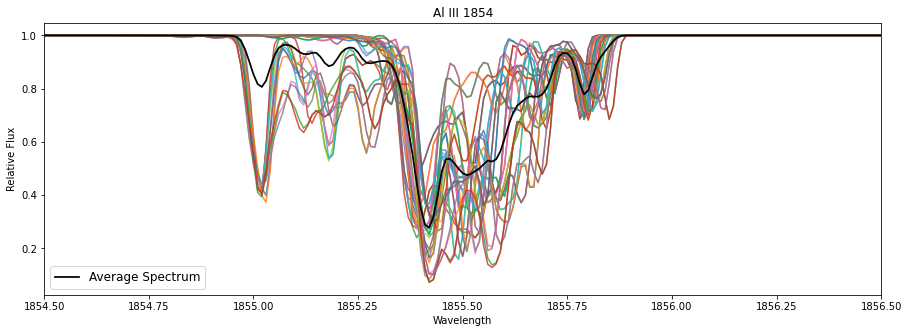

In [31]:
al1854_t = spec_avg(0, .62, .49, 2, .62, .49, 6, 6,
                    'Al III 1854', 'Al', 'III', 1854.5, 1856.5, 1854.72, 5.57E+08, 5.75E-01, 26.98,
                    DIY=True, ind_p=True)

yt : [INFO     ] 2021-11-23 23:33:04,836 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:33:04,839 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:33:06,056 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:33:06,206 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:33:06,207 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:33:06,208 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:33:06,209 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 

yt : [INFO     ] 2021-11-23 23:33:14,744 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:33:14,745 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:33:14,746 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:33:14,748 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:33:14,761 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:33:14,767 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:33:14,906 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:33:14,913 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 5442.45it/s]
yt : [INFO     ] 2021-11-23 23:33:15,062 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:33:15,078 Getting segment at z = 0.0: [0.         0.161953

yt : [INFO     ] 2021-11-23 23:33:23,823 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:33:23,828 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3689.00it/s]
yt : [INFO     ] 2021-11-23 23:33:24,023 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:33:24,040 Getting segment at z = 0.0: [0.         0.16195313 0.25476562] unitary to [1.         0.16195313 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:33:24,042 Getting subsegment: [0.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:33:25,302 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:33:25,417 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:33:25,418 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-2

yt : [INFO     ] 2021-11-23 23:33:34,715 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:33:34,830 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:33:34,831 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:33:34,832 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:33:34,833 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:33:34,834 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:33:34,836 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:33:34,851 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:33:34,858 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:33:34,999 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:33:35,006 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:33:43,654 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:33:43,660 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:33:43,796 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:33:43,802 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2115.41it/s]
yt : [INFO     ] 2021-11-23 23:33:44,099 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:33:44,115 Getting segment at z = 0.0: [0.         0.16585938 0.2528125 ] unitary to [1.         0.16585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:33:44,116 Getting subsegment: [0.0 unitary, 0.165859375 unitary, 0.2528125 unitary] to [1.0 unitary, 0.165859375 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:33:45,384 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:33:45,498 Parameters: curren

yt : [INFO     ] 2021-11-23 23:33:53,214 Getting subsegment: [0.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary] to [1.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:33:54,406 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:33:54,518 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:33:54,519 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:33:54,520 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:33:54,520 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:33:54,521 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:33:54,523 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:33:54,538 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:33:54,545 Identified 2

yt : [INFO     ] 2021-11-23 23:34:03,847 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:34:03,850 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:34:03,865 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:34:03,872 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:34:04,022 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:34:04,029 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1564.69it/s]
yt : [INFO     ] 2021-11-23 23:34:04,417 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:34:04,433 Getting segment at z = 0.0: [0.         0.16976563 0.25085937] unitary to [1.         0.16976563 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:34:04,437 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.169765625 unitary, 0.25

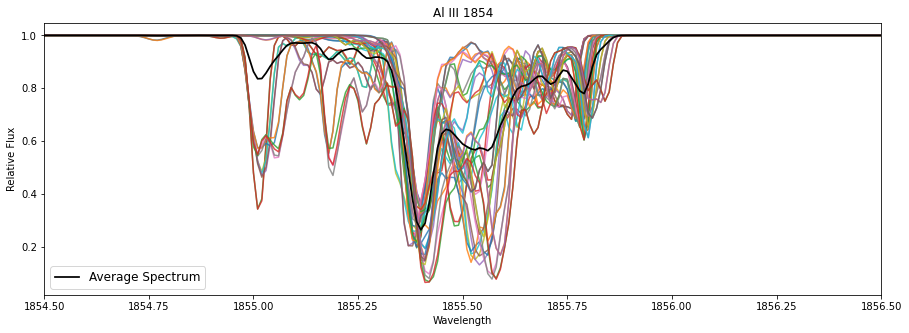

In [32]:
al1854_b = spec_avg(0, .32, .49, 2, .32, .49, 6, 6,
                    'Al III 1854', 'Al', 'III', 1854.5, 1856.5, 1854.72, 5.57E+08, 5.75E-01, 26.98,
                    DIY=True, ind_p=True)

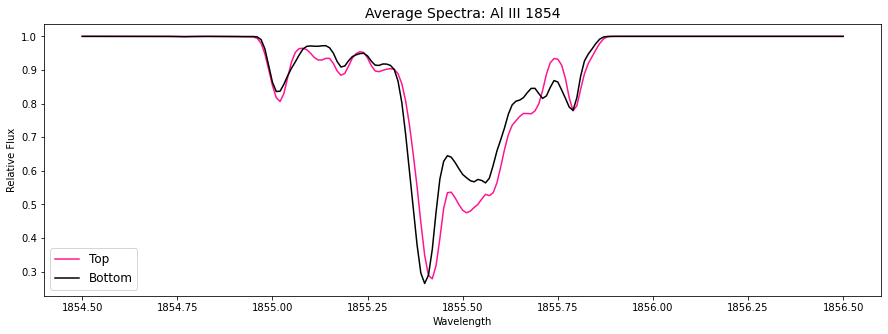

In [33]:
compare(al1854_t[0], al1854_t[1], al1854_b[0], al1854_b[1], ' Al III 1854')

## Fe II 2600

yt : [INFO     ] 2021-11-23 23:51:32,433 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:51:32,436 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:51:33,803 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:51:33,919 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:51:33,920 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:51:33,921 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:51:33,922 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_lengt

yt : [INFO     ] 2021-11-23 23:51:43,756 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:51:43,757 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:51:43,758 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:51:43,759 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:51:43,760 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:51:43,762 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:51:43,776 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:51:43,782 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:51:43,916 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:51:43,921 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 32

yt : [INFO     ] 2021-11-23 23:51:53,456 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:51:53,671 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:51:53,681 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1935.41it/s]
yt : [INFO     ] 2021-11-23 23:51:54,031 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:51:54,046 Getting segment at z = 0.0: [0.         0.31195312 0.25476562] unitary to [1.         0.31195312 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:51:54,049 Getting subsegment: [0.0 unitary, 0.311953125 unitary, 0.254765625 unitary] to [1.0 unitary, 0.311953125 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:51:55,445 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:51:55,620 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:51:55,620 Parameters: domain_dimen

yt : [INFO     ] 2021-11-23 23:52:04,380 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:52:04,493 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:52:04,494 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:52:04,495 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:52:04,496 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:52:04,496 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:52:04,499 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:52:04,513 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:52:04,521 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:52:04,773 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:52:04,782 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:52:13,839 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:52:13,853 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:52:13,858 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:52:14,000 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:52:14,005 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1513.32it/s]
yt : [INFO     ] 2021-11-23 23:52:14,402 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:52:14,417 Getting segment at z = 0.0: [0.         0.31585938 0.2528125 ] unitary to [1.         0.31585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:52:14,420 Getting subsegment: [0.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary] to [1.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:52:15,657 Saving field da

yt : [INFO     ] 2021-11-23 23:52:23,593 Getting subsegment: [0.0 unitary, 0.3178125 unitary, 0.250859375 unitary] to [1.0 unitary, 0.3178125 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:52:24,769 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:52:24,884 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:52:24,885 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:52:24,885 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:52:24,886 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:52:24,887 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:52:24,889 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:52:24,905 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:52:24,913 Identified 2.490e+02 octs
yt : [

yt : [INFO     ] 2021-11-23 23:52:34,107 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:52:34,110 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:52:34,124 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:52:34,129 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:52:34,266 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:52:34,274 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1308.89it/s]
yt : [INFO     ] 2021-11-23 23:52:34,720 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:52:34,735 Getting segment at z = 0.0: [0.         0.31976562 0.25085937] unitary to [1.         0.31976562 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:52:34,738 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.319765625 unitary, 0.250

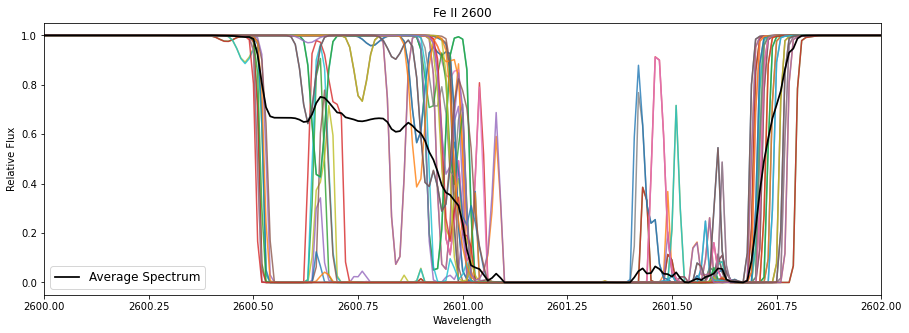

In [36]:
fe26_t = spec_avg(0, .62, .49, 2, .62, .49, 6, 6,
                  'Fe II 2600', 'Fe', 'II', 2600, 2602, 2600.17, 2.37E+08, 2.4E-01, 55.85,
                  DIY=True, ind_p=True)

yt : [INFO     ] 2021-11-23 23:52:59,204 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:52:59,207 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:53:00,471 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:53:00,623 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:53:00,624 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:53:00,625 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:53:00,626 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 

yt : [INFO     ] 2021-11-23 23:53:09,922 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:53:09,923 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:53:09,924 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:53:09,926 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:53:09,940 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:53:09,946 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:53:10,087 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:53:10,091 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4055.28it/s]
yt : [INFO     ] 2021-11-23 23:53:10,276 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:53:10,292 Getting segment at z = 0.0: [0.         0.1619531

yt : [INFO     ] 2021-11-23 23:53:19,362 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:53:19,369 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3249.06it/s]
yt : [INFO     ] 2021-11-23 23:53:19,582 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:53:19,598 Getting segment at z = 0.0: [0.         0.16195313 0.25476562] unitary to [1.         0.16195313 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:53:19,600 Getting subsegment: [0.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:53:20,744 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:53:20,865 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:53:20,866 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23

yt : [INFO     ] 2021-11-23 23:53:30,548 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:53:30,704 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:53:30,704 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:53:30,706 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:53:30,707 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:53:30,709 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:53:30,712 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:53:30,731 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:53:30,739 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:53:31,052 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:53:31,062 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:53:41,221 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:53:41,226 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:53:41,426 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:53:41,431 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1364.86it/s]
yt : [INFO     ] 2021-11-23 23:53:41,861 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:53:41,877 Getting segment at z = 0.0: [0.         0.16585938 0.2528125 ] unitary to [1.         0.16585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:53:41,878 Getting subsegment: [0.0 unitary, 0.165859375 unitary, 0.2528125 unitary] to [1.0 unitary, 0.165859375 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:53:43,425 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:53:43,566 Parameters: current

yt : [INFO     ] 2021-11-23 23:53:52,575 Getting subsegment: [0.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary] to [1.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:53:53,885 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:53:54,007 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:53:54,008 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:53:54,008 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:53:54,009 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:53:54,010 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:53:54,012 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:53:54,029 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:53:54,036 Identified 2

yt : [INFO     ] 2021-11-23 23:54:04,002 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:54:04,005 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:54:04,027 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:54:04,035 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:54:04,227 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:54:04,234 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1050.81it/s]
yt : [INFO     ] 2021-11-23 23:54:04,786 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:54:04,805 Getting segment at z = 0.0: [0.         0.16976563 0.25085937] unitary to [1.         0.16976563 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:54:04,809 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.169765625 unitary, 0.250

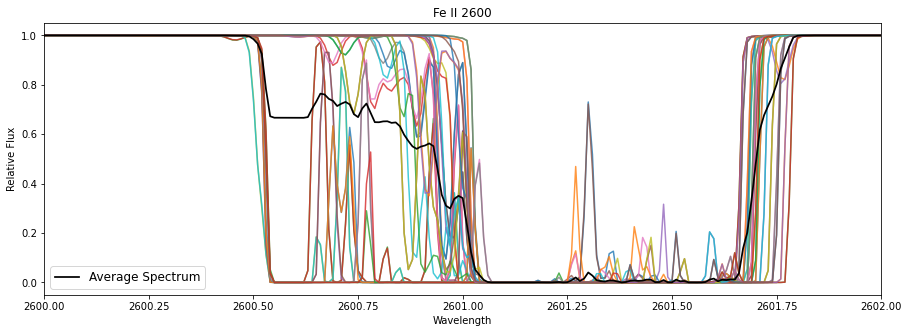

In [37]:
fe26_b = spec_avg(0, .32, .49, 2, .32, .49, 6, 6,
                  'Fe II 2600', 'Fe', 'II', 2600, 2602, 2600.17, 2.37E+08, 2.4E-01, 55.85,
                  DIY=True, ind_p=True)

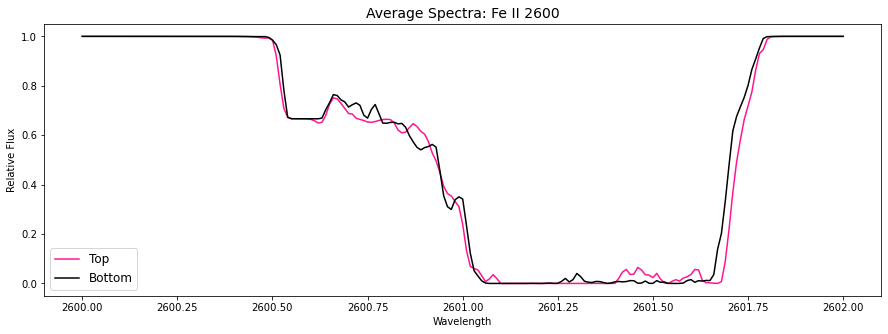

In [38]:
compare(fe26_t[0], fe26_t[1], fe26_b[0], fe26_b[1], ' Fe II 2600')

## Mg II 2796

yt : [INFO     ] 2021-11-23 23:56:53,865 Getting segment at z = 0.0: [0.    0.31  0.245] unitary to [1.    0.31  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:56:53,868 Getting subsegment: [0.0 unitary, 0.31000000000000005 unitary, 0.245 unitary] to [1.0 unitary, 0.31000000000000005 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:56:55,318 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:56:55,480 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:56:55,481 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:56:55,482 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:56:55,483 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_lengt

yt : [INFO     ] 2021-11-23 23:57:06,068 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:57:06,069 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:57:06,069 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:57:06,070 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:57:06,071 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:57:06,074 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:57:06,096 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:57:06,104 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:57:06,311 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:57:06,317 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 33

yt : [INFO     ] 2021-11-23 23:57:16,821 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:57:17,109 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:57:17,117 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2446.87it/s]
yt : [INFO     ] 2021-11-23 23:57:17,396 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:57:17,412 Getting segment at z = 0.0: [0.         0.31195312 0.25476562] unitary to [1.         0.31195312 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:57:17,414 Getting subsegment: [0.0 unitary, 0.311953125 unitary, 0.254765625 unitary] to [1.0 unitary, 0.311953125 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:57:18,644 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:57:18,815 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:57:18,816 Parameters: domain_dimen

yt : [INFO     ] 2021-11-23 23:57:28,882 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:57:28,997 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:57:28,998 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:57:28,999 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:57:29,000 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:57:29,001 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:57:29,004 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:57:29,029 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:57:29,037 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:57:29,281 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:57:29,288 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:57:38,439 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:57:38,454 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:57:38,460 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:57:38,610 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:57:38,615 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1123.44it/s]
yt : [INFO     ] 2021-11-23 23:57:39,130 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:57:39,147 Getting segment at z = 0.0: [0.         0.31585938 0.2528125 ] unitary to [1.         0.31585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:57:39,149 Getting subsegment: [0.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary] to [1.0 unitary, 0.31585937500000005 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:57:40,449 Saving field da

yt : [INFO     ] 2021-11-23 23:57:48,746 Getting subsegment: [0.0 unitary, 0.3178125 unitary, 0.250859375 unitary] to [1.0 unitary, 0.3178125 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:57:49,986 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:57:50,123 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:57:50,124 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:57:50,124 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:57:50,125 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:57:50,126 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:57:50,128 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:57:50,145 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:57:50,153 Identified 2.490e+02 octs
yt : [

yt : [INFO     ] 2021-11-23 23:57:59,766 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:57:59,768 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:57:59,784 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:57:59,790 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:57:59,933 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:57:59,941 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1000.01it/s]
yt : [INFO     ] 2021-11-23 23:58:00,513 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:58:00,530 Getting segment at z = 0.0: [0.         0.31976562 0.25085937] unitary to [1.         0.31976562 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:58:00,534 Getting subsegment: [0.0 unitary, 0.319765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.319765625 unitary, 0.250

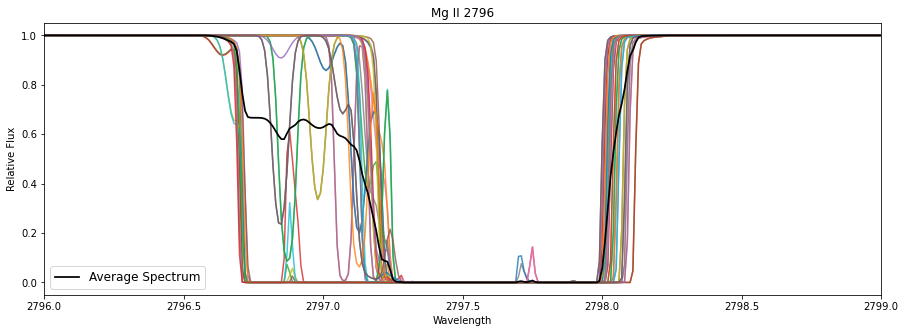

In [39]:
mg27_t = spec_avg(0, .62, .49, 2, .62, .49, 6, 6,
                  'Mg II 2796', 'Mg', 'II', 2796, 2799, 2796.35, 2.68E+08, 6.29E-01, 24.31,
                  DIY=True, ind_p=True)

yt : [INFO     ] 2021-11-23 23:58:28,458 Getting segment at z = 0.0: [0.    0.16  0.245] unitary to [1.    0.16  0.245] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-11-23 23:58:28,461 Getting subsegment: [0.0 unitary, 0.16 unitary, 0.245 unitary] to [1.0 unitary, 0.16 unitary, 0.245 unitary].
yt : [INFO     ] 2021-11-23 23:58:29,794 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:58:29,917 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:58:29,918 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:58:29,919 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:58:29,919 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 

yt : [INFO     ] 2021-11-23 23:58:39,576 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:58:39,577 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:58:39,578 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:58:39,580 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:58:39,594 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:58:39,600 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:58:39,753 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:58:39,758 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3311.19it/s]
yt : [INFO     ] 2021-11-23 23:58:39,972 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:58:39,989 Getting segment at z = 0.0: [0.         0.1619531

yt : [INFO     ] 2021-11-23 23:58:49,250 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:58:49,258 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2595.90it/s]
yt : [INFO     ] 2021-11-23 23:58:49,515 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:58:49,532 Getting segment at z = 0.0: [0.         0.16195313 0.25476562] unitary to [1.         0.16195313 0.25476562] unitary.
yt : [INFO     ] 2021-11-23 23:58:49,534 Getting subsegment: [0.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary] to [1.0 unitary, 0.16195312500000003 unitary, 0.254765625 unitary].
yt : [INFO     ] 2021-11-23 23:58:50,665 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:58:50,775 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:58:50,776 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23

yt : [INFO     ] 2021-11-23 23:59:00,181 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:59:00,341 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:59:00,342 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:59:00,343 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:59:00,344 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:59:00,345 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:59:00,347 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:59:00,369 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:59:00,377 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:59:00,670 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:59:00,679 Creating spectrum
Add

yt : [INFO     ] 2021-11-23 23:59:09,525 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:59:09,531 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:59:09,669 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:59:09,674 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1322.22it/s]
yt : [INFO     ] 2021-11-23 23:59:10,120 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:59:10,138 Getting segment at z = 0.0: [0.         0.16585938 0.2528125 ] unitary to [1.         0.16585938 0.2528125 ] unitary.
yt : [INFO     ] 2021-11-23 23:59:10,140 Getting subsegment: [0.0 unitary, 0.165859375 unitary, 0.2528125 unitary] to [1.0 unitary, 0.165859375 unitary, 0.2528125 unitary].
yt : [INFO     ] 2021-11-23 23:59:11,363 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:59:11,475 Parameters: current

yt : [INFO     ] 2021-11-23 23:59:19,192 Getting subsegment: [0.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary] to [1.0 unitary, 0.16781250000000003 unitary, 0.250859375 unitary].
yt : [INFO     ] 2021-11-23 23:59:20,322 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-11-23 23:59:20,437 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-11-23 23:59:20,438 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-11-23 23:59:20,439 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-11-23 23:59:20,440 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2021-11-23 23:59:20,441 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:59:20,443 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:59:20,460 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:59:20,467 Identified 2

yt : [INFO     ] 2021-11-23 23:59:29,542 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-11-23 23:59:29,544 Setting instrument to Custom
yt : [INFO     ] 2021-11-23 23:59:29,558 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-11-23 23:59:29,565 Identified 2.490e+02 octs
yt : [INFO     ] 2021-11-23 23:59:29,719 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-11-23 23:59:29,725 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1031.41it/s]
yt : [INFO     ] 2021-11-23 23:59:30,277 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2021-11-23 23:59:30,295 Getting segment at z = 0.0: [0.         0.16976563 0.25085937] unitary to [1.         0.16976563 0.25085937] unitary.
yt : [INFO     ] 2021-11-23 23:59:30,297 Getting subsegment: [0.0 unitary, 0.169765625 unitary, 0.250859375 unitary] to [1.0 unitary, 0.169765625 unitary, 0.250

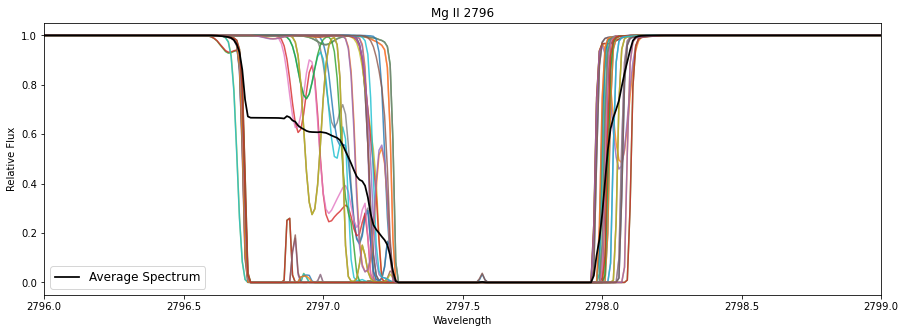

In [40]:
mg27_b = spec_avg(0, .32, .49, 2, .32, .49, 6, 6,
                  'Mg II 2796', 'Mg', 'II', 2796, 2799, 2796.35, 2.68E+08, 6.29E-01, 24.31,
                  DIY=True, ind_p=True)

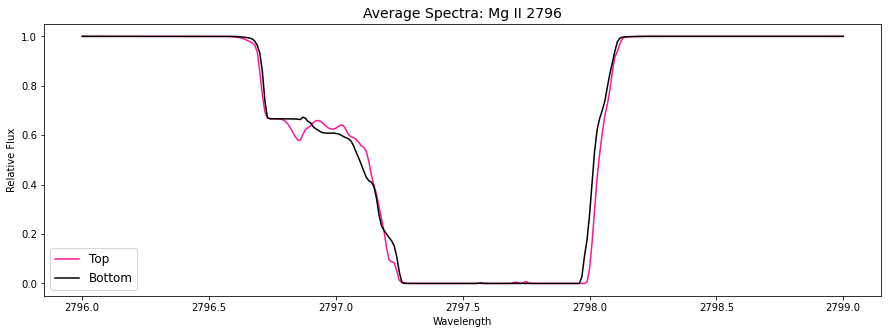

In [41]:
compare(mg27_t[0], mg27_t[1], mg27_b[0], mg27_b[1], ' Mg II 2796')